## This notebook shows how to learn weights for a linear regression model using gradient descent

In [1]:
#Import needed libraries 
import pandas as pd, numpy as np

### Load the King County sales data

In [2]:
sales_df = pd.read_csv('kc_house_data.csv')

In [3]:
#Get the number of observations in the data
print sales_df.shape

(21613, 21)


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

### Scatter plot of price against square footage houses in the data

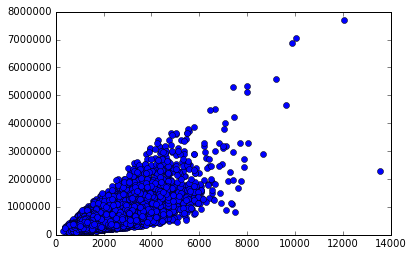

In [5]:
plt.plot(sales_df['sqft_living'], sales_df['price'], 'bo')

## Some useful functions

In [6]:
def get_numpy_data(data, features, output):
    '''
    Function to create a numpy array from a DataFrame. This function returnd the feature columns
    and the target column as a numpy array.
    
    data: A DataFrame containing the data
    
    features: A list of strings. Each element of this list should be a feature we want to use
    for regression
    
    output: The target column
    '''
    
    data.loc[:,'constant'] = 1 #add a constant column to the SFrame
    features = ['constant'] + features
    features_df = data[features] #select out features specified by feature list
    #convert features_df to a numpy matrix
    feature_matrix = np.array(features_df)
    #assign output_sarray to the target output
    output_array = data[output]
    #convert sarray to a numpy array
    output_array = np.array(output_array)
    return (feature_matrix, output_array)

In [7]:
#Function to compute the cost for a given set of weights
def compute_cost(feature_matrix, output, weights):
    RSS = np.square(np.dot(feature_matrix, weights) - output).sum()
    return RSS

In [8]:
#Function to predict output given data and weights
def predict_output(feature_matrix, weights):
    #create the predictions vector using np.dot()
    predictions = np.dot(feature_matrix, weights)
    return (predictions)

#Function to compute derivative
def feature_derivative(errors, feature):
    derivative = 2 * np.dot(errors, feature)
    return derivative

In [9]:
def regression_gradient_descent(feature_matrix, output, initial_weights, step_size, num_iters):
    J_history = np.zeros((num_iters, 1))
    weights = np.array(initial_weights) #make sure its a numpy array
    
    for itr in range(num_iters):
        #compute the predictions
        predictions = predict_output(feature_matrix, weights)
        #compute the errors
        errors = predictions - output
        
        #while we haven't reached the tolerance yet update each features weight
        for i in range(len(weights)):
            derivative = feature_derivative(errors, feature_matrix[:,i])
            weights[i] = weights[i] - step_size * derivative
        J_history[itr, 0] = compute_cost(feature_matrix, output, weights)
        #Print something after every 100 iterations
        if itr % 100 == 0:
            print 'Cost at Iteration --> ', itr, J_history[itr, 0]
        
    return (weights, J_history)

### Let's run Gradient Descent on the data. For this tutorial we will use only square feet to predict the price of a house

In [10]:
#First let's split the data into training and test sets
from sklearn.cross_validation import train_test_split

In [11]:
#Set random_state = 1 to ensure reproducibility
train_data, test_data = train_test_split(sales_df, test_size = 0.2, random_state = 1)

In [12]:
#Let's define the features and the target
features = ['sqft_living']
target = 'price'

In [14]:
#Call get_numpy_data function
train_matrix, output_train = get_numpy_data(train_data, features, target)

In [15]:
#Look at the first 10 rows of train matrix
train_matrix[0:10]

array([[   1, 2190],
       [   1, 2370],
       [   1, 1230],
       [   1, 2510],
       [   1, 1160],
       [   1, 1220],
       [   1, 1960],
       [   1, 2060],
       [   1, 2700],
       [   1, 2470]], dtype=int64)

In [16]:
#Specify parameters for gradient descent
initial_weights = np.zeros(2)
step_size = 7e-12
num_iters = 2500

In [17]:
weights, J_hist = regression_gradient_descent(train_matrix, output_train, initial_weights, step_size, num_iters)

Cost at Iteration -->  0 1.45757674986e+15
Cost at Iteration -->  100 1.11003168267e+15
Cost at Iteration -->  200 1.11003166327e+15
Cost at Iteration -->  300 1.11003164386e+15
Cost at Iteration -->  400 1.11003162446e+15
Cost at Iteration -->  500 1.11003160505e+15
Cost at Iteration -->  600 1.11003158565e+15
Cost at Iteration -->  700 1.11003156625e+15
Cost at Iteration -->  800 1.11003154684e+15
Cost at Iteration -->  900 1.11003152744e+15
Cost at Iteration -->  1000 1.11003150804e+15
Cost at Iteration -->  1100 1.11003148863e+15
Cost at Iteration -->  1200 1.11003146923e+15
Cost at Iteration -->  1300 1.11003144983e+15
Cost at Iteration -->  1400 1.11003143042e+15
Cost at Iteration -->  1500 1.11003141102e+15
Cost at Iteration -->  1600 1.11003139162e+15
Cost at Iteration -->  1700 1.11003137222e+15
Cost at Iteration -->  1800 1.11003135282e+15
Cost at Iteration -->  1900 1.11003133341e+15
Cost at Iteration -->  2000 1.11003131401e+15
Cost at Iteration -->  2100 1.11003129461e+15


In [18]:
weights

array([  -2.80755345,  261.59324314])

### Making predictions

In [19]:
#Call get_numpy_data function on test data
test_matrix, output_test = get_numpy_data(test_data, features, target)

In [20]:
predictions = predict_output(test_matrix, weights)

In [21]:
print 'Predicted prices for the first 10 houses in the test data set'
predictions[0:10]

Predicted prices for the first 10 houses in the test data set


array([ 729842.34081507,  426394.17876938,  619973.17869508,
        593813.85438079,  374075.53014081,  585966.05708651,
        694004.0665045 ,  928653.20560362,  418546.38147509,
        633052.84085222])

In [22]:
#RSS of our model on test data
def RSS(preds, outcome):
    residual = preds - outcome
    return sum(residual**2)

In [23]:
print RSS(predictions, output_test)

3.74192611415e+14


## Aside: Histogram showing distribution of residuals

(array([  3.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          3.00000000e+00,   1.10000000e+01,   3.10000000e+01,
          1.05000000e+02,   2.61900000e+03,   1.54200000e+03,
          8.00000000e+00]),
 array([-4547804.22768226, -3966826.83445397, -3385849.44122569,
        -2804872.04799741, -2223894.65476912, -1642917.26154084,
        -1061939.86831256,  -480962.47508428,   100014.91814401,
          680992.31137229,  1261969.70460057]),
 <a list of 10 Patch objects>)

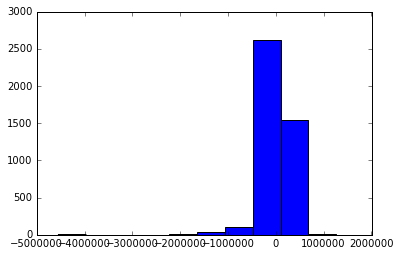

In [25]:
plt.hist(predictions - output_test)